# Breast Cancer Classification using Decision Tree Classifier 

### Introduction

Breast cancer remains one of the leading causes of mortality among women globally. Accurate and timely classification of tumors as **benign** (non-cancerous) or **malignant** (cancerous) is vital for improving patient outcomes through early diagnosis and treatment.

This project focuses on developing a **Decision Tree Classifier**, a supervised machine learning algorithm known for its simplicity, interpretability, and ability to model non-linear decision boundaries. The model is trained on the **Breast Cancer Wisconsin (Diagnostic) Dataset**, which contains features derived from digitized images of fine needle aspirates (FNA) of breast masses.

### Key Objectives

- Load and preprocess the dataset for machine learning
- Train a **Decision Tree Classifier** to predict tumor type
- Evaluate model performance using:
  * Accuracy
  * Precision, Recall, F1-Score
  * Confusion Matrix
  * Visualize the decision tree structure and feature importances

In [1]:
import pandas as pd

### Load the uploaded file of Dataset.

In [2]:
df = pd.read_csv("breast-cancer.csv")

### Display the first few rows and basic info about the dataset

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop the 'id' column
df.drop(columns=['id'], inplace=True)

# Encode the 'diagnosis' column: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split data into features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Decision Tree Classifier 

- This section outlines the implementation of a **Decision Tree Classifier** using the Gini Impurity criterion for breast cancer classification.
- The classifier is evaluated using standard performance metrics.


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ---- Evaluation Metrics ----
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Benign", "Malignant"])
conf_matrix = confusion_matrix(y_test, y_pred)

# ---- Formatted Output ----

print("\n Classification Report:")
print("-" * 50)
print(report)

# Create a labeled DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=["Actual Benign", "Actual Malignant"],
                              columns=["Predicted Benign", "Predicted Malignant"])

print(" Confusion Matrix:")
print("-" * 50)
print(conf_matrix_df)



 Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

 Confusion Matrix:
--------------------------------------------------
                  Predicted Benign  Predicted Malignant
Actual Benign                   68                    3
Actual Malignant                 3                   40


In [29]:
print("\n Model Evaluation Summary")
print(f" Accuracy: {accuracy:.4f} ({accuracy:.2%})")


 Model Evaluation Summary
 Accuracy: 0.9474 (94.74%)


#### **Observation**:

The Decision Tree Classifier was applied to the breast cancer dataset, achieving a high accuracy of **94.74%**.
It effectively handled both **Benign** and **Malignant** classes, with precision, recall, and F1-scores above 0.93 for both categories.
The model successfully captured non-linear relationships between features and class labels through its hierarchical decision structure.

#### **Key Insight**:

Decision Trees are well-suited for classification tasks involving both categorical and numerical features.
They provide clear decision-making logic and are particularly effective when class boundaries are non-linear or complex.
The balanced confusion matrix indicates that the model performs reliably across both classes with minimal bias.

With high accuracy and balanced class-wise metrics, the Decision Tree Classifier is a strong choice for binary classification problems like breast cancer detection.
However, slight overfitting risk remains, and performance may improve further with ensemble methods like **Random Forest** or **Gradient Boosted Trees**.


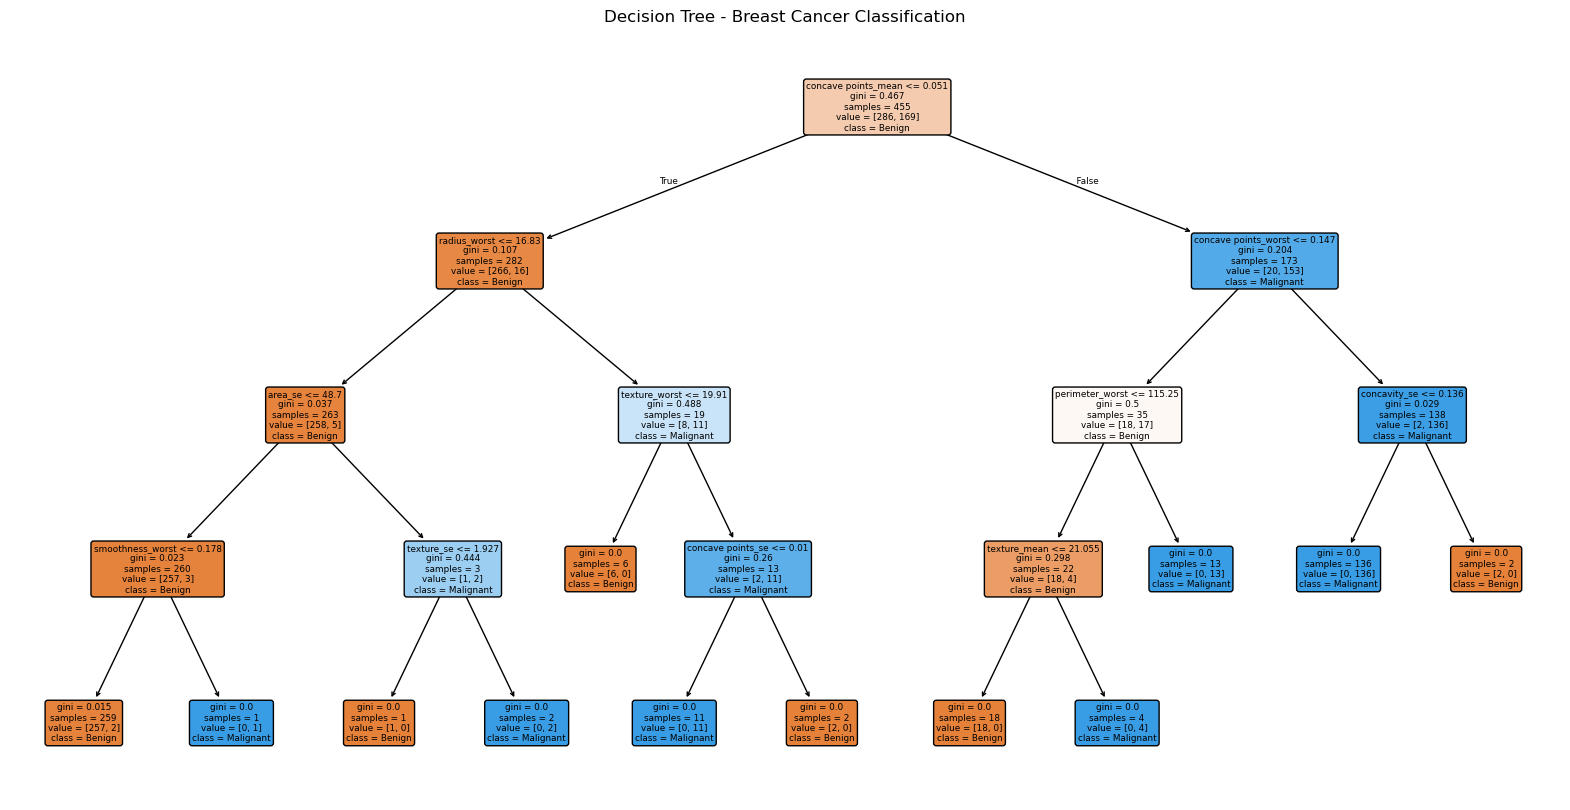

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=["Benign", "Malignant"], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree - Breast Cancer Classification")
plt.show()


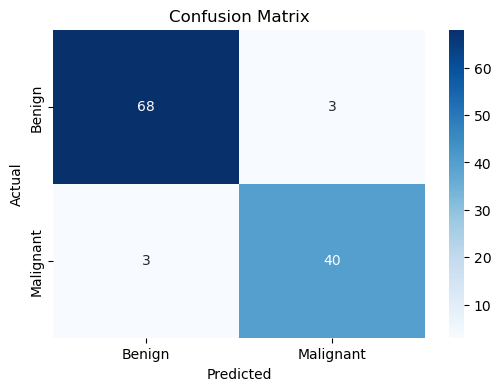

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Benign", "Malignant"], 
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

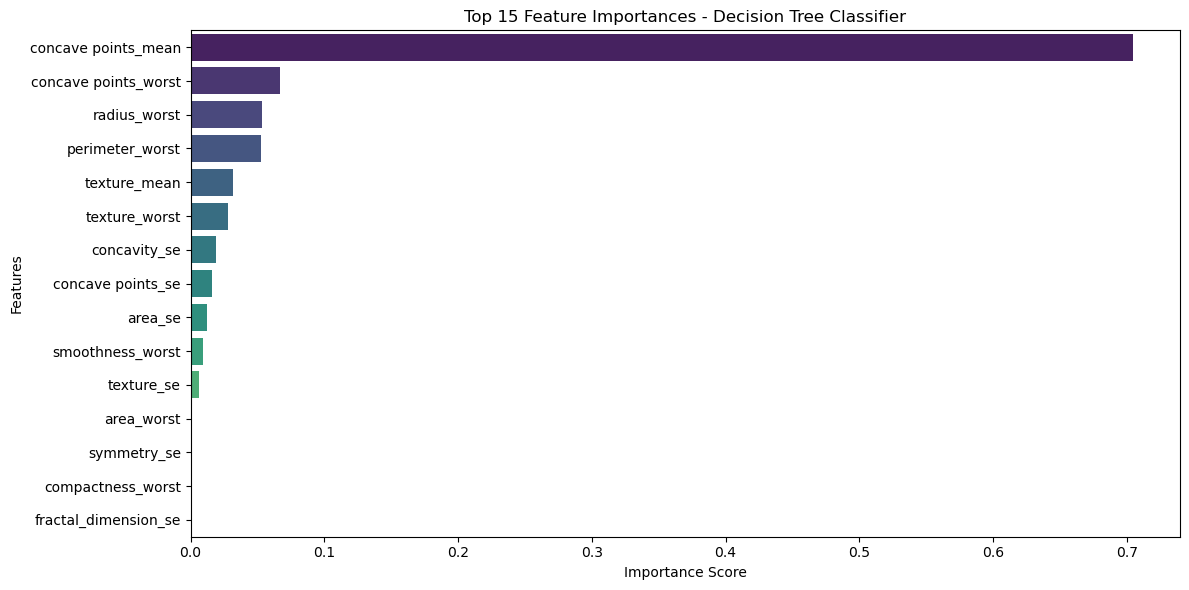

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Sort and select top 15
feature_importances_sorted = feature_importances.sort_values(ascending=False)[:15]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importances_sorted.values,
    y=feature_importances_sorted.index,
    hue=feature_importances_sorted.index,  # Assign hue
    legend=False,
    palette='viridis'
)
plt.title("Top 15 Feature Importances - Decision Tree Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

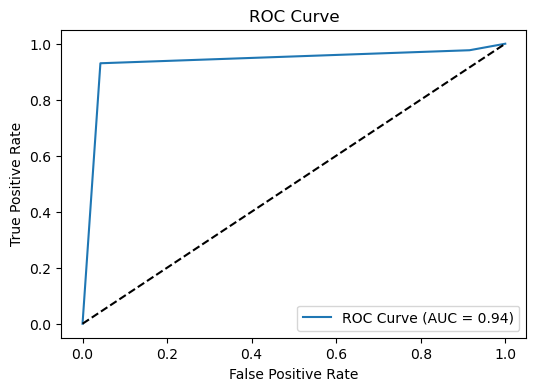

In [41]:
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Conclusion 

The Decision Tree Classifier was applied to the Breast Cancer Wisconsin (Diagnostic) Dataset, achieving a high accuracy of **94.74%**. The model demonstrated balanced performance across both benign and malignant classes, with precision, recall, and F1-scores exceeding **0.93** for each category. These results reflect the model’s ability to accurately capture complex patterns in the data.

### Key Insights

- **Interpretability**: The Decision Tree's structure offers clear and explainable decision logic, which is particularly valuable in healthcare settings where transparency is critical.
- **Non-linear Capability**: The model effectively captured non-linear relationships between features and target classes, making it suitable for complex classification problems.
- **Balanced Classification**: A well-balanced confusion matrix indicates the model performs reliably across both classes with minimal bias.
- **Potential Overfitting**: While accuracy is high, the model may be prone to overfitting, particularly on smaller or imbalanced datasets. This highlights the importance of regularization techniques such as pruning and depth limitation.
- **Opportunities for Improvement**: Ensemble methods such as Random Forest and Gradient Boosting, as well as cross-validation and hyperparameter tuning, could further enhance model robustness and generalization.

### Final Remark

This project demonstrates the practical application of machine learning in medical diagnostics. The Decision Tree Classifier stands out for its accuracy and interpretability, reinforcing its value in binary classification tasks like breast cancer detection. Future work can build on this foundation by exploring advanced models and validation strategies to further optimize predictive performance.


``` Sarvesh Jayant Patil - Sarrveshpatil@gmail.com ```